
[[ 0.        ]
 [ 0.0732333 ]
 [ 0.13310491]
 ...
 [ 0.10765089]
 [ 0.07473524]
 [-0.14547745]]
[ 0.          0.0732333   0.20633821 ... -4.35711538 -4.28238015
 -4.42785759]


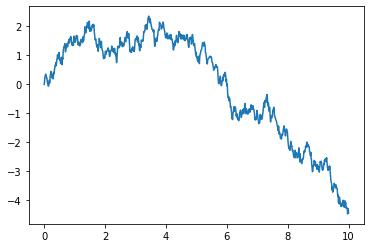

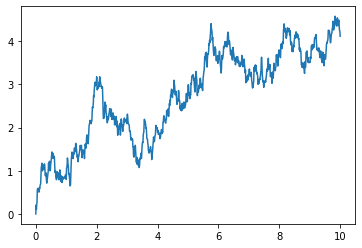

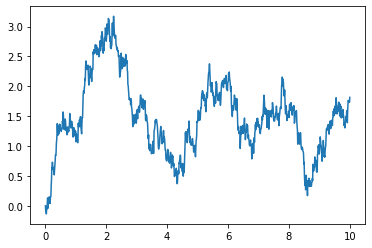

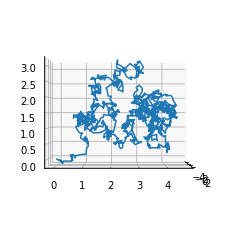

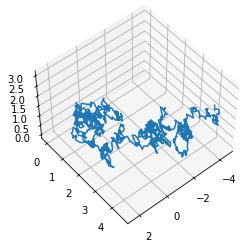

1001
0.0257356938
0.05220974757757757
0.07824023172344689
0.1040994735005015
0.1300146338052209
0.15534800101507537
0.17914238141851105
0.20332210235649548
0.22766241942540325
0.25168795136226035
0.27552773740404046
0.29943158993933267
0.322836886902834
0.34604826611955425
0.3684180420791075
0.39133997445685276
0.414341554796748
0.435493244587996
0.4569722542362526
0.47830288569826707
0.4994218932755102
0.5203103050357508
0.5420667830777097
0.56348819419652
0.5850363300922131
0.6081917036410258
0.6325673616837781
0.6569076439465571
0.6797134587242799
0.7025005738105046
0.7247976882886598
0.7481420183075335
0.7710359547727273
0.7946905010754912
0.8186170630952382
0.8421976105492228
0.8648544068153527
0.8857702273208723
0.9064673386694387
0.926229068792924
0.9472853861041666
0.9710703467674661
0.9930103185073069
1.0161433454649949
1.0399456766841004
1.0630359055078535
1.0859666756918238
1.1087519706190978
1.1317388093697478
1.1541839469085173
1.1772220865263157
1.2005175225395155
1.22401

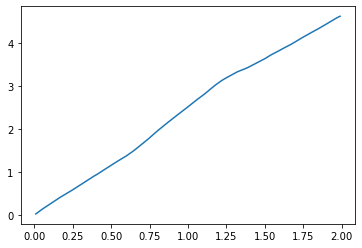

In [1]:



import numpy as np
k_B, T, eta, a, delta_t = 1.38e-23, 300, 1e-3, 5e-7, 0.01 
D = (k_B*T)/(6*np.pi*eta*a)
sigma_m = np.sqrt(2*D*delta_t) # standard deviation in metres
sigma = sigma_m * 1e6 # standard deviation in micrometres
mu = 0 # Equal chance of moving in the positive or negative direction for x,y and z



x = np.random.normal(mu, sigma, size = (1001,1)) # x, y and z are independent so all modelled by same distribution
x[:1] = 0 # At time 0, the position is (0,0,0)
y = np.random.normal(mu, sigma, size = (1001,1)) 
y[:1] = 0
z = np.random.normal(mu, sigma, size = (1001,1))
z[:1] = 0
t = np.arange(0,10.01,0.01) # t goes from 0 to 1 in intervals of 0.01
print()





x_new = np.cumsum(x)
y_new = np.cumsum(y)
z_new = np.cumsum(z)
print(x)
print(x_new)




import matplotlib.pyplot as plt
plt.plot(t,x_new)
plt.show()
plt.plot(t,y_new)
plt.show()
plt.plot(t,z_new)
plt.show()




ax = plt.axes(projection='3d') 
ax.plot3D(x_new,y_new,z_new) # Overall plot showing the random walk in 3D
ax.view_init(0,0)            # Changes the point of view of the graph
plt.show()
ax = plt.axes(projection='3d')
ax.plot3D(x_new,y_new,z_new) # Overall plot showing the random walk in 3D
ax.view_init(50,50)
plt.show()


from numpy import array

x_4dp = np.around(x_new, decimals = 4)      #
x_4dpmulti = x_4dp * 10000
x_interger = (np.rint(x_4dpmulti)).astype(int)

y_4dp = np.around(y_new, decimals = 4)
y_4dpmulti = y_4dp * 10000
y_interger = (np.rint(y_4dpmulti)).astype(int)

z_4dp = np.around(z_new, decimals = 4)
z_4dpmulti = z_4dp * 10000
z_interger = (np.rint(z_4dpmulti)).astype(int)
i = 0 #defines i and m for use in the loops further down
m = 1 # m is the step of which the next point is at
print(len(x_interger))

xi =[]
yi =[]
zi =[]
dist2 = []
distX = []
distY = []
distZ = []
meanplot =[]


for m in range(1,200,1):
    for i in range(0,len(x_new)-m):
        xi.append(x_interger[i+m] - x_interger[i]) # Treats each point like a vector and subtracts the initial position from
        yi.append(y_interger[i+m] -  y_interger[i])  # Final, thereby creating a vector between the points
        zi.append(z_interger[i+m] - z_interger[i])
        distX.append((xi[i])**2)     # Squares each element of the new vector to get the length
        distY.append((yi[i])**2)
        distZ.append((zi[i])**2)
        dist2.append(distX[i] + distY[i] + distZ[i])  # Adds them together, did not bother doing the square root, since we want
                                                     # mean squared, which means each value would become squared
    xi.clear()   #clears all the values in the lists after it has looped through one value for i
    yi.clear()   # such that for a new value of m the defined lists can be reused
    zi.clear()
    distX.clear()
    distY.clear()
    distZ.clear()
    divisor = 100000000   #since we multiplied with 10000 due to the loop not liking non-integer numbers
    dist = [v/divisor for v in dist2]  #divides all items in list by the divisor
    #print(dist)
    meandist = np.mean(dist)  #function for mean of list
    meanplot.append(meandist)
    print(meandist)
    dist.clear()
    dist2.clear()
    
m1 = np.arange(0.01,2,0.01)
plt.plot(m1,meanplot)
plt.show()


In [2]:
import pandas as pd
df = pd.read_csv(r"P_data.csv", header = None) 
df.columns =['x', 'y', 'z']
print(df)

              x          y          z
0      0.000000   0.000000   0.000000
1      0.125867   0.098338   0.120363
2      0.251733   0.196676   0.240726
3      0.377600   0.295013   0.361089
4      0.503467   0.393351   0.481452
...         ...        ...        ...
5496 -28.030567 -15.076263 -17.160015
5497 -27.868055 -15.192238 -17.148196
5498 -27.705543 -15.308213 -17.136377
5499 -27.543031 -15.424188 -17.124557
5500 -27.380519 -15.540162 -17.112738

[5501 rows x 3 columns]


[ 0.15984399  0.06784975 -0.98480775]
59.999999999999986
59.99999999999999
59.999999999999986
59.999999999999986
60.00000000000001
59.999999999999986
59.99999999999999
59.999999999999986
59.99999999999999
59.999999999999986
59.999999999999986
59.99999999999999
59.999999999999986
59.999999999999986
59.999999999999986
59.99999999999997
60.00000000000001
59.999999999999986
59.99999999999997
60.00000000000001
59.99999999999999
60.00000000000001
59.999999999999986
59.999999999999986
59.999999999999986
59.999999999999986
59.999999999999986
59.99999999999999
60.00000000000001
59.999999999999986
59.999999999999986
59.999999999999986
59.999999999999986
59.999999999999986
59.999999999999986
59.999999999999986
59.999999999999986
59.999999999999986
59.99999999999999
59.99999999999999
59.99999999999999
60.00000000000001
60.00000000000001
59.99999999999999
59.99999999999999
59.99999999999997
59.999999999999986
59.99999999999999
59.999999999999986
59.999999999999986
60.00000000000001
59.9999999999999

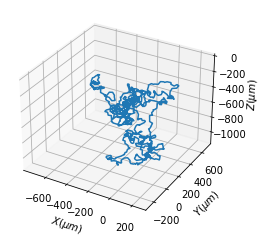

In [15]:
import numpy as np
import random
import math as m
import csv
v = 20 # 20 microns per second, speed of bacterium

theta1 = random.randint(0,360)
theta = theta1*np.pi/180
phi1 = random.randint(0,180)
phi = phi1*np.pi/180

#x = np.cos(theta)*np.sin(phi)*r    conversion relations between spherical polar and cartesian
#y = np.sin(theta)*np.sin(phi)*r
#z = np.cos(theta)*r


t = np.arange(0,2.01,0.01)


rad = []

b = len(t)

for i in range(0,b):
    tau = t[i]
    r = v*tau
    rad.append(r)

x=[]
y=[]
z=[]

def Rx(thetaX):
  return np.matrix([[ 1, 0           , 0           ],
                   [ 0, m.cos(thetaX),-m.sin(thetaX)],
                   [ 0, m.sin(thetaX), m.cos(thetaX)]])
  
def Ry(thetaY):
  return np.matrix([[ m.cos(thetaY), 0, m.sin(thetaY)],
                   [ 0           , 1, 0           ],
                   [-m.sin(thetaY), 0, m.cos(thetaY)]])      # Defines the rotation matrices as functions
  
def Rz(thetaZ):
  return np.matrix([[ m.cos(thetaZ), -m.sin(thetaZ), 0 ],
                   [ m.sin(thetaZ), m.cos(thetaZ) , 0 ],
                   [ 0           , 0            , 1 ]])

for i in range(0,b):
    rho = rad[i]
    x.append(np.cos(phi)*np.sin(theta)*rho)        #converts spherical polars back to cartesian coordinates
    y.append(np.sin(phi)*np.sin(theta)*rho)
    z.append(np.cos(theta)*rho)

listX = []
listY = []
listZ = []
directionalvec = []

import matplotlib.pyplot as plt




def rotateZ(angle1,angle2,angle3,angle4):

    vecdirec1 = [0,0,1]
    vecdirec = np.array(vecdirec1) # Defines a vector purely in z direction
    
    rotation = vecdirec@Ry(angle4) 
    rot1 = rotation@Rz(angle3)     # Matrix multiplication between rotation matrices and z direction vector
    rot2 = rot1@Ry(angle2)         # done to align z axis with new direction/make coordinate system follow the vector
    rot3 = rot2@np.transpose(Rz(angle1))

    vec = np.squeeze(np.asarray(rot3))  #converts from type matrix to array
    normvec = (1/(np.sqrt(vec[0]**2+vec[1]**2+vec[2]**2)))*vec # Ensures the vector is normalised

    return normvec

def rotateZ1(angle1,angle2,angle3,angle4):

    vecdirec11 = [0,0,1]
    vecdirec1 = np.array(vecdirec11) # Defines a vector purely in z direction
    
    rotation = vecdirec1@Ry(angle4) 
    rot1 = rotation@Rz(angle3)     # Matrix multiplication between rotation matrices and z direction vector
    rot2 = rot1@np.transpose(Ry(angle2))         # done to align z axis with new direction/make coordinate system follow the vector
    rot3 = rot2@np.transpose(Rz(angle1))

    vec = np.squeeze(np.asarray(rot3))  #converts from type matrix to array
    normvec = (1/(np.sqrt(vec[0]**2+vec[1]**2+vec[2]**2)))*vec # Ensures the vector is normalised
    
    return normvec

x_n = []
y_n = []
z_n = []
plotlists = []

x1_n = []
y1_n = []
z1_n = []
unit1 = []

unit1.append(x[-1]-x[0])
unit1.append(y[-1]-y[0])
unit1.append(z[-1]-z[0])
unitvec = (1/(np.sqrt(unit1[0]**2 + unit1[1]**2 + unit1[2]**2)))*np.array(unit1)
print(unitvec)

for æ in range(0,1000):
    f = random.randint(0,360)*np.pi/180 #creates random angle on cone
    
    if æ == 0:
        if 59 < np.arccos(np.dot(unitvec,np.array(rotateZ(phi,theta,f,60*np.pi/180))))*180/np.pi < 61:
            normalisedvec = np.array(rotateZ(phi,theta,f,60*np.pi/180))
            
        else:
            normalisedvec = np.array(rotateZ1(phi,theta,f,60*np.pi/180))
                        
    else:
        r21 = (np.sqrt(normalisedvec[0]**2+normalisedvec[1]**2+normalisedvec[2]**2)) #finds length of run
        theta21 = (np.arccos(normalisedvec[2]/(r21))) # arccos of z divided by length of run
        phi21 = (np.arctan(normalisedvec[1]/normalisedvec[0])) # arctan of y divided by change in x

        if 59 < np.arccos(np.dot(normalisedvec,np.array(rotateZ(phi21,theta21,f,60*np.pi/180))))*180/np.pi < 61:
            normalisedvec = np.array(rotateZ(phi21,theta21,f,60*np.pi/180))
            
        else:
            normalisedvec = np.array(rotateZ1(phi21,theta21,f,60*np.pi/180))



    directionalvec.append(normalisedvec)
    
    å = random.randint(10,len(t))

    for l in range(0,å):
        x1_n.append((normalisedvec[0])*v*t[l])   # since the length of the normalised vector is 1, squaring each index of normvec
        y1_n.append((normalisedvec[1])*v*t[l]) # gives the result of breaking the speed down into components of x,y,z
        z1_n.append((normalisedvec[2])*v*t[l])

    
     
    for d in range(0,å):
        x_n.append(x[-1] + (normalisedvec[0])*v*t[d])   # since the length of the normalised vector is 1, squaring each index of normvec
        y_n.append(y[-1] + (normalisedvec[1])*v*t[d]) # gives the result of breaking the speed down into components of x,y,z
        z_n.append(z[-1] + (normalisedvec[2])*v*t[d])

    for _ in range(0,len(x)):
        listX.append(x[_])
        listY.append(y[_])
        listZ.append(z[_])

    x.clear()
    y.clear()
    z.clear()
    for ø in range(0,len(x_n)):
        x.append(x_n[ø])
        y.append(y_n[ø])
        z.append(z_n[ø])
    x_n.clear()
    y_n.clear()
    z_n.clear()

T = np.arange(0,len(listX),1)

CRW_data = np.column_stack([T,listX, listY, listZ])
np.savetxt("CRW_data.csv", CRW_data, delimiter = ",", fmt ='% s')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('$X(µm)$')
ax.set_ylabel('$Y(µm)$')
ax.set_zlabel('$Z(µm)$')

#ax.quiver(0, 0, 0, normvec[0], normvec[1], normvec[2], color='r', arrow_length_ratio=0.1) #plots the new line from the end of the first line produced
ax.plot3D(listX,listY,listZ)

for k in range(0,len(directionalvec)-1):
    print(np.arccos(np.dot(directionalvec[k],directionalvec[k+1]))*180/np.pi)

    



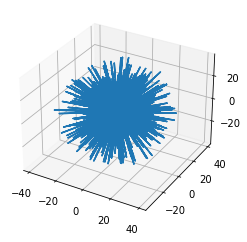

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#ax.quiver(0, 0, 0, normvec[0], normvec[1], normvec[2], color='r', arrow_length_ratio=0.1) #plots the new line from the end of the first line produced
ax.plot3D(x1_n,y1_n,z1_n)

[-0.11392345  0.13105394 -0.98480775]
[33.7436290686521, -10.985414529615825, 31.738113090559448, 35.13419165065211, -18.290921613900075, 32.0747761244828, 5.04723858187435, -30.62145586648358, -39.8547777608638, 11.22978391977492]
102.4895955491706
59.99999999999999
59.999999999999986
115.76861466634784
59.99999999999999
59.999999999999986
59.999999999999986
121.77152152966814
59.999999999999986
59.99999999999999
125.30862504835729
56.90100310105716
59.999999999999986
40.140520554208194
59.999999999999986
59.999999999999986
67.74461168498516
59.99999999999999
59.999999999999986
59.999999999999986
59.999999999999986
59.99999999999999
107.9014304256882
59.99999999999999
59.999999999999986
59.999999999999986
148.6918891884795
60.00000000000001
60.00000000000001
59.999999999999986
59.99999999999999
59.999999999999986
59.99999999999999
60.00000000000001
88.855696609069
59.99999999999999
59.999999999999986
59.999999999999986
59.999999999999986
59.99999999999999
158.063917637278
59.999999999

59.999999999999986
164.8756295658834
95.60163349616391
60.00000000000001
59.99999999999999
60.00000000000001
59.999999999999986
107.80683257470395
60.00000000000001
128.23303717380173
59.99999999999999
60.00000000000001
92.94356116205714
25.61413231744294
113.33658313553056
73.35608545099366
59.999999999999986
59.999999999999986
59.999999999999986
59.99999999999999
111.82619250910392
59.99999999999999
50.69741087222851
59.999999999999986
59.99999999999999
147.18133755326008
62.773719579829276
60.00000000000001
60.00000000000001
59.999999999999986
59.999999999999986
59.999999999999986
117.43480291662122
59.99999999999999
64.41820507035982
59.999999999999986
60.00000000000001
59.99999999999997
11.918889340723998
59.99999999999999
59.99999999999999
91.50934307341193
84.64886990338528
60.00000000000001
59.999999999999986
59.999999999999986
59.999999999999986
59.99999999999999
59.999999999999986
104.64285115979182
59.999999999999986
36.94030261494288
126.78169638845037
59.999999999999986
59

157.16471858286945
59.999999999999986
59.99999999999999
59.999999999999986
59.99999999999999
59.999999999999986
59.99999999999999
126.61129320018692
121.9261126998693
96.70312445957413
59.999999999999986
59.99999999999999
152.4046160336226
60.00000000000001
59.99999999999999
59.999999999999986
59.999999999999986
59.999999999999986
59.999999999999986
59.99999999999999
131.42765363208994
59.999999999999986
59.999999999999986
60.00000000000001
59.999999999999986
46.03293926769189
77.29822547424709
59.999999999999986
148.0424777914382
59.99999999999999
59.99999999999999
60.00000000000001
143.2215378374077
59.99999999999999
59.999999999999986
60.00000000000003
59.999999999999986
59.999999999999986
60.00000000000001
57.88506569105965
59.999999999999986
125.08715784027007
59.99999999999999
144.35258482448612
59.999999999999986
59.99999999999999
59.999999999999986
113.88590851782578
59.99999999999999
59.99999999999999
59.999999999999986
59.999999999999986
59.999999999999986
59.99999999999999
5

59.99999999999999
59.99999999999999
60.00000000000001
59.999999999999986
59.99999999999999
60.00000000000001
141.33291761063987
59.99999999999999
59.99999999999999
60.00000000000001
59.99999999999999
71.58214546833418
59.99999999999999
59.999999999999986
111.7959521857356
59.99999999999999
126.0653459536772
59.999999999999986
59.99999999999999
59.999999999999986
137.99775300228876
59.999999999999986
76.85765940296211
59.999999999999986
59.99999999999999
60.00000000000001
59.999999999999986
59.999999999999986
114.71315242879881
103.63734582348704
59.99999999999999
60.00000000000001
60.00000000000001
131.34555654945711
45.99032844388763
59.999999999999986
59.999999999999986
60.00000000000001
59.999999999999986
59.999999999999986
83.37224728843806
59.99999999999999
59.92572475693967
59.999999999999986
59.999999999999986
59.99999999999999
60.00000000000001
59.99999999999999
59.999999999999986
60.00000000000001
59.999999999999986
59.99999999999997
59.999999999999986
76.37045831158713
59.999

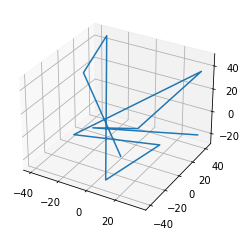

In [5]:
import numpy as np
import random
import math as m
import csv
v = 20 # 20 microns per second, speed of bacterium

theta1 = random.randint(0,360)
theta = theta1*np.pi/180
phi1 = random.randint(0,180)
phi = phi1*np.pi/180

#x = np.cos(theta)*np.sin(phi)*r    conversion relations between spherical polar and cartesian
#y = np.sin(theta)*np.sin(phi)*r
#z = np.cos(theta)*r


t = np.arange(0,2.01,0.01)


rad = []

b = len(t)

for i in range(0,b):
    tau = t[i]
    r = v*tau
    rad.append(r)

x=[]
y=[]
z=[]

def Rx(thetaX):
  return np.matrix([[ 1, 0           , 0           ],
                   [ 0, m.cos(thetaX),-m.sin(thetaX)],
                   [ 0, m.sin(thetaX), m.cos(thetaX)]])
  
def Ry(thetaY):
  return np.matrix([[ m.cos(thetaY), 0, m.sin(thetaY)],
                   [ 0           , 1, 0           ],
                   [-m.sin(thetaY), 0, m.cos(thetaY)]])      # Defines the rotation matrices as functions
  
def Rz(thetaZ):
  return np.matrix([[ m.cos(thetaZ), -m.sin(thetaZ), 0 ],
                   [ m.sin(thetaZ), m.cos(thetaZ) , 0 ],
                   [ 0           , 0            , 1 ]])

for i in range(0,b):
    rho = rad[i]
    x.append(np.cos(phi)*np.sin(theta)*rho)        #converts spherical polars back to cartesian coordinates
    y.append(np.sin(phi)*np.sin(theta)*rho)
    z.append(np.cos(theta)*rho)

listX = []
listY = []
listZ = []
directionalvec = []

import matplotlib.pyplot as plt




def rotateZ(angle1,angle2,angle3,angle4):

    vecdirec1 = [0,0,1]
    vecdirec = np.array(vecdirec1) # Defines a vector purely in z direction
    
    rotation = vecdirec@Ry(angle4) 
    rot1 = rotation@Rz(angle3)     # Matrix multiplication between rotation matrices and z direction vector
    rot2 = rot1@Ry(angle2)         # done to align z axis with new direction/make coordinate system follow the vector
    rot3 = rot2@np.transpose(Rz(angle1))

    vec = np.squeeze(np.asarray(rot3))  #converts from type matrix to array
    normvec = (1/(np.sqrt(vec[0]**2+vec[1]**2+vec[2]**2)))*vec # Ensures the vector is normalised

    return normvec

def rotateZ1(angle1,angle2,angle3,angle4):

    vecdirec11 = [0,0,1]
    vecdirec1 = np.array(vecdirec11) # Defines a vector purely in z direction
    
    rotation = vecdirec1@Ry(angle4) 
    rot1 = rotation@Rz(angle3)     # Matrix multiplication between rotation matrices and z direction vector
    rot2 = rot1@np.transpose(Ry(angle2))         # done to align z axis with new direction/make coordinate system follow the vector
    rot3 = rot2@np.transpose(Rz(angle1))

    vec = np.squeeze(np.asarray(rot3))  #converts from type matrix to array
    normvec = (1/(np.sqrt(vec[0]**2+vec[1]**2+vec[2]**2)))*vec # Ensures the vector is normalised
    
    return normvec

x_n = []
y_n = []
z_n = []
plotlists = []

x1_n = []
y1_n = []
z1_n = []
unit1 = []

unit1.append(x[-1]-x[0])
unit1.append(y[-1]-y[0])
unit1.append(z[-1]-z[0])
unitvec = (1/(np.sqrt(unit1[0]**2 + unit1[1]**2 + unit1[2]**2)))*np.array(unit1)
print(unitvec)

p = 0
prntlstX = []
prntlstY = []
prntlstZ = []
for p in range(0,10):
    
    for æ in range(0,1000):
        f = random.randint(0,360)*np.pi/180 #creates random angle on cone
    
        if æ == 0:
            if 59 < np.arccos(np.dot(unitvec,np.array(rotateZ(phi,theta,f,60*np.pi/180))))*180/np.pi < 61:
                normalisedvec = np.array(rotateZ(phi,theta,f,60*np.pi/180))
            
            else:
                normalisedvec = np.array(rotateZ1(phi,theta,f,60*np.pi/180))
                        
        else:
            r21 = (np.sqrt(normalisedvec[0]**2+normalisedvec[1]**2+normalisedvec[2]**2)) #finds length of run
            theta21 = (np.arccos(normalisedvec[2]/(r21))) # arccos of z divided by length of run
            phi21 = (np.arctan(normalisedvec[1]/normalisedvec[0])) # arctan of y divided by change in x

            if 59 < np.arccos(np.dot(normalisedvec,np.array(rotateZ(phi21,theta21,f,60*np.pi/180))))*180/np.pi < 61:
                normalisedvec = np.array(rotateZ(phi21,theta21,f,60*np.pi/180))
            
            else:
                normalisedvec = np.array(rotateZ1(phi21,theta21,f,60*np.pi/180))



        directionalvec.append(normalisedvec)
    
        å = random.randint(10,len(t))

        for l in range(0,å):
            x1_n.append((normalisedvec[0])*v*t[l])   # since the length of the normalised vector is 1, squaring each index of normvec
            
            y1_n.append((normalisedvec[1])*v*t[l]) # gives the result of breaking the speed down into components of x,y,z
        
            z1_n.append((normalisedvec[2])*v*t[l])

    
     
        for d in range(0,å):
            x_n.append(x[-1] + (normalisedvec[0])*v*t[d]) #since the length of the normalised vector is 1, squaring each index of normvec
            if x_n[d]**2 > 50**2:
                normalisedvec[0] = -normalisedvec[0]
            
            y_n.append(y[-1] + (normalisedvec[1])*v*t[d]) # gives the result of breaking the speed down into components of x,y,z
            if y_n[d]**2 > 50**2:
                normalisedvec[1] = -normalisedvec[1]
            z_n.append(z[-1] + (normalisedvec[2])*v*t[d])
            if z_n[d]**2 > 50**2:
                normalisedvec[2] = -normalisedvec[2]
    
        for _ in range(0,len(x)):
            listX.append(x[_])
            listY.append(y[_])
            listZ.append(z[_])

        x.clear()
        y.clear()
        z.clear()
        for ø in range(0,len(x_n)):
            x.append(x_n[ø])
            y.append(y_n[ø])
            z.append(z_n[ø])
        x_n.clear()
        y_n.clear()
        z_n.clear()

    prntlstX.append(listX[-1])
    prntlstY.append(listY[-1])
    prntlstZ.append(listZ[-1])
    listX.clear()
    listY.clear()
    listZ.clear()
    p = p+1
print(prntlstX)    
    
T = np.arange(0,len(listX),1)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#ax.quiver(0, 0, 0, normvec[0], normvec[1], normvec[2], color='r', arrow_length_ratio=0.1) #plots the new line from the end of the first line produced
ax.plot3D(prntlstX,prntlstY,prntlstZ)

for k in range(0,len(directionalvec)-1):
    print(np.arccos(np.dot(directionalvec[k],directionalvec[k+1]))*180/np.pi)

    



0
-369.0
-225.0
-433.0
-259.0
380.0
302.0
384.0
475.0
-312.0
457.0
-112.0
-126.0
379.0
-52.0
111.0
416.0
-27.0
76.0
-130.0
481.0
-346.0
-482.0
433.0
154.0
398.0
-273.0
-276.0
-52.0
-460.0
-258.0
-147.0
201.0
50.0
-451.0
493.0
61.0
149.0
-215.0
-337.0
408.0
325.0
-202.0
361.0
366.0
-485.0
303.0
254.0
-433.0
99.0
303.0
[[2500, 10514, 15334, 25296, 18096, 26748, 26661, 44390, 29125, 28188, 11058], [11017, 41530, 51690, 63464, 71045, 58052, 57165, 96556, 90146, 51883, 19276], [7806, 36658, 57269, 56624, 84625, 60748, 67483, 78715, 71172, 54931, 15326], [10932, 51022, 58528, 67082, 63652, 61390, 55082, 88203, 67068, 51475, 16371], [21426, 67889, 50914, 54527, 57530, 46718, 61950, 70835, 49953, 42913, 14139], [15466, 58758, 49427, 57015, 55466, 51827, 48104, 52542, 50558, 56197, 13319], [13755, 41101, 46636, 50623, 53247, 63910, 46864, 67316, 46900, 43585, 16463], [14988, 49220, 44845, 48377, 53726, 47493, 63841, 40240, 47571, 37441, 16078], [17158, 54132, 59882, 52088, 57831, 56659, 54896, 

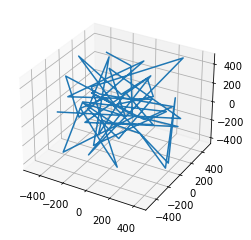

In [6]:
import numpy as np
import random
import math as m
import csv


#x = np.cos(theta)*np.sin(phi)*r    conversion relations between spherical polar and cartesian
#y = np.sin(theta)*np.sin(phi)*r
#z = np.cos(theta)*r





def Rx(thetaX):
  return np.matrix([[ 1, 0           , 0           ],
                   [ 0, m.cos(thetaX),-m.sin(thetaX)],
                   [ 0, m.sin(thetaX), m.cos(thetaX)]])
  
def Ry(thetaY):
  return np.matrix([[ m.cos(thetaY), 0, m.sin(thetaY)],
                   [ 0           , 1, 0           ],
                   [-m.sin(thetaY), 0, m.cos(thetaY)]])      # Defines the rotation matrices as functions
  
def Rz(thetaZ):
  return np.matrix([[ m.cos(thetaZ), -m.sin(thetaZ), 0 ],
                   [ m.sin(thetaZ), m.cos(thetaZ) , 0 ],
                   [ 0           , 0            , 1 ]])



listX = []
listY = []
listZ = []
directionalvec = []

import matplotlib.pyplot as plt




def rotateZ(angle1,angle2,angle3,angle4):

    vecdirec1 = [0,0,1]
    vecdirec = np.array(vecdirec1) # Defines a vector purely in z direction
    
    rotation = vecdirec@Ry(angle4) 
    rot1 = rotation@Rz(angle3)     # Matrix multiplication between rotation matrices and z direction vector
    rot2 = rot1@Ry(angle2)         # done to align z axis with new direction/make coordinate system follow the vector
    rot3 = rot2@np.transpose(Rz(angle1))

    vec = np.squeeze(np.asarray(rot3))  #converts from type matrix to array
    normvec = (1/(np.sqrt(vec[0]**2+vec[1]**2+vec[2]**2)))*vec # Ensures the vector is normalised

    return normvec

def rotateZ1(angle1,angle2,angle3,angle4):

    vecdirec11 = [0,0,1]
    vecdirec1 = np.array(vecdirec11) # Defines a vector purely in z direction
    
    rotation = vecdirec1@Ry(angle4) 
    rot1 = rotation@Rz(angle3)     # Matrix multiplication between rotation matrices and z direction vector
    rot2 = rot1@np.transpose(Ry(angle2))         # done to align z axis with new direction/make coordinate system follow the vector
    rot3 = rot2@np.transpose(Rz(angle1))

    vec = np.squeeze(np.asarray(rot3))  #converts from type matrix to array
    normvec = (1/(np.sqrt(vec[0]**2+vec[1]**2+vec[2]**2)))*vec # Ensures the vector is normalised
    
    return normvec



x_n = []
y_n = []
z_n = []
plotlists = []

x1_n = []
y1_n = []
z1_n = []
unit1 = []

p = 0
prntlstX = []
prntlstY = []
prntlstZ = []
v = 20 # 20 microns per second, speed of bacterium
t = np.arange(0,2.01,0.01)

heatmap = ([[ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [ 0 , 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [ 0 , 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [ 0 , 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [ 0 , 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [ 0 , 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [ 0 , 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [ 0 , 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [ 0 , 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [ 0 , 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [ 0 , 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
print(heatmap[0][10])

for p in range(0,50):
    
    theta1 = random.randint(0,360)
    theta = theta1*np.pi/180
    phi1 = random.randint(0,180)
    phi = phi1*np.pi/180
    
    offsetX = random.randint(-500,500)
    offsetY = random.randint(-500,500)
    offsetZ = random.randint(-500,500)
    rad = []
    x=[]
    y=[]
    z=[]
    b = len(t)

    for i in range(0,b):
        tau = t[i]
        r = v*tau
        rad.append(r)
    for i in range(0,b):
        rho = rad[i]
        x.append(np.cos(phi)*np.sin(theta)*rho + offsetX)        #converts spherical polars back to cartesian coordinates
        y.append(np.sin(phi)*np.sin(theta)*rho + offsetY)
        z.append(np.cos(theta)*rho + offsetZ)    
        
    print(x[0])
        
    for æ in range(0,1000):
        f = random.randint(0,360)*np.pi/180 #creates random angle on cone
    
        if æ == 0:
            if 59 < np.arccos(np.dot(unitvec,np.array(rotateZ(phi,theta,f,60*np.pi/180))))*180/np.pi < 61:
                normalisedvec = np.array(rotateZ(phi,theta,f,60*np.pi/180))
            
            else:
                normalisedvec = np.array(rotateZ1(phi,theta,f,60*np.pi/180))
                        
        else:
            r21 = (np.sqrt(normalisedvec[0]**2+normalisedvec[1]**2+normalisedvec[2]**2)) #finds length of run
            theta21 = (np.arccos(normalisedvec[2]/(r21))) # arccos of z divided by length of run
            phi21 = (np.arctan(normalisedvec[1]/normalisedvec[0])) # arctan of y divided by change in x

            if 59 < np.arccos(np.dot(normalisedvec,np.array(rotateZ(phi21,theta21,f,60*np.pi/180))))*180/np.pi < 61:
                normalisedvec = np.array(rotateZ(phi21,theta21,f,60*np.pi/180))
            
            else:
                normalisedvec = np.array(rotateZ1(phi21,theta21,f,60*np.pi/180))



        directionalvec.append(normalisedvec)
    
        å = random.randint(10,len(t))

        for l in range(0,å):
            x1_n.append((normalisedvec[0])*v*t[l])   # since the length of the normalised vector is 1, squaring each index of normvec
            
            y1_n.append((normalisedvec[1])*v*t[l]) # gives the result of breaking the speed down into components of x,y,z
        
            z1_n.append((normalisedvec[2])*v*t[l])

    
     
        for d in range(0,å):
            x_n.append(x[-1] + (normalisedvec[0])*v*t[d]) #since the length of the normalised vector is 1, squaring each index of normvec
            if x_n[d]**2 > 500**2:
                normalisedvec[0] = -normalisedvec[0]
            
            y_n.append(y[-1] + (normalisedvec[1])*v*t[d]) # gives the result of breaking the speed down into components of x,y,z
            if y_n[d]**2 > 500**2:
                normalisedvec[1] = -normalisedvec[1]
            z_n.append(z[-1] + (normalisedvec[2])*v*t[d])
            if z_n[d]**2 > 500**2:
                normalisedvec[2] = -normalisedvec[2]
    
        for _ in range(0,len(x)):
            listX.append(x[_])
            listY.append(y[_])
            listZ.append(z[_])

        x.clear()
        y.clear()
        z.clear()
        for ø in range(0,len(x_n)):
            x.append(x_n[ø])
            y.append(y_n[ø])
            z.append(z_n[ø])
        x_n.clear()
        y_n.clear()
        z_n.clear()
            
    
    for i in range(0,len(listX)):
        row = round(listX[i]/100)+5
        column = round(listY[i]/100)+5
        heatmap[row][column] = heatmap[row][column] + 1
            
        
        
        
        

                
            
        
        
        
    prntlstX.append(listX[-1])
    prntlstY.append(listY[-1])
    prntlstZ.append(listZ[-1])
    listX.clear()
    listY.clear()
    listZ.clear()
    p = p+1

print(heatmap)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#ax.quiver(0, 0, 0, normvec[0], normvec[1], normvec[2], color='r', arrow_length_ratio=0.1) #plots the new line from the end of the first line produced
ax.plot3D(prntlstX,prntlstY,prntlstZ)

#for k in range(0,len(directionalvec)-1):
#    print(np.arccos(np.dot(directionalvec[k],directionalvec[k+1]))*180/np.pi)

    



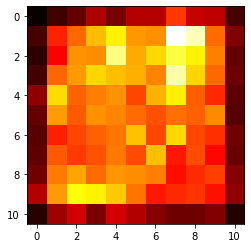

In [7]:
plt.imshow(heatmap, cmap='hot', interpolation='nearest')
plt.show()

224.0
35.0
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
304.0
412.0
405.0
6.0
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m

m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
455.0
-500.0
485.0
-66.0
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m

-168.0
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
487.0
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
87.0
-9.0
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
-228.0
-304.0
37.0
z
z
z
z
z
z
z


z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
-120.0
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z

m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
-49.0
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
-168.0
168.0
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
-310.0
-39.0
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
213.0
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
-68.0
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m


203.0
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m


m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
222.0
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z


m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
282.0
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m


m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
-473.0
-95.0
134.0
z
z

m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z


z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
405.0
99.0
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
-11.0
m
m
m
m
m
m
m
m
m
m
z

m
m
m
m
m
m
m
m
m
m
96.0
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z

z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
429.0
296.0
419.0
284.0
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
485.0
217.0
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z


445.0
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
182.0
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
-313.0
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z

m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z


-315.0
249.0
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
-157.0
-403.0
27.0
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z


z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
332.0
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
-236.0
185.0
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
-111.0
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z


m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z


m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
41.0
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m

m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
277.0
365.0
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
-62.0
-155.0
144.0
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
353.0
-54.0
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z

-454.0
-374.0
-337.0
-230.0
-78.0
307.0
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
252.0
122.0
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m


z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
305.0
-162.0
-344.0
141.0
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m


z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
417.0
363.0
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
-251.0
52.0
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
m


m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
-264.0
302.0
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m

m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m


m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
162.0
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z
z
z
z
z
m
m
m
m
m
m
m
m
m
m
z
z
z
z
z
z


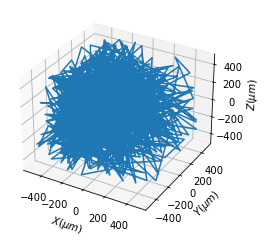

In [1]:
import numpy as np
import random
import math as m
import csv


#x = np.cos(theta)*np.sin(phi)*r    conversion relations between spherical polar and cartesian
#y = np.sin(theta)*np.sin(phi)*r
#z = np.cos(theta)*r





def Rx(thetaX):
  return np.matrix([[ 1, 0           , 0           ],
                   [ 0, m.cos(thetaX),-m.sin(thetaX)],
                   [ 0, m.sin(thetaX), m.cos(thetaX)]])
  
def Ry(thetaY):
  return np.matrix([[ m.cos(thetaY), 0, m.sin(thetaY)],
                   [ 0           , 1, 0           ],
                   [-m.sin(thetaY), 0, m.cos(thetaY)]])      # Defines the rotation matrices as functions
  
def Rz(thetaZ):
  return np.matrix([[ m.cos(thetaZ), -m.sin(thetaZ), 0 ],
                   [ m.sin(thetaZ), m.cos(thetaZ) , 0 ],
                   [ 0           , 0            , 1 ]])



listX = []
listY = []
listZ = []
directionalvec = []

import matplotlib.pyplot as plt




def rotateZ(angle1,angle2,angle3,angle4):

    vecdirec1 = [0,0,1]
    vecdirec = np.array(vecdirec1) # Defines a vector purely in z direction
    
    rotation = vecdirec@Ry(angle4) 
    rot1 = rotation@Rz(angle3)     # Matrix multiplication between rotation matrices and z direction vector
    rot2 = rot1@Ry(angle2)         # done to align z axis with new direction/make coordinate system follow the vector
    rot3 = rot2@np.transpose(Rz(angle1))

    vec = np.squeeze(np.asarray(rot3))  #converts from type matrix to array
    normvec = (1/(np.sqrt(vec[0]**2+vec[1]**2+vec[2]**2)))*vec # Ensures the vector is normalised

    return normvec

def rotateZ1(angle1,angle2,angle3,angle4):

    vecdirec11 = [0,0,1]
    vecdirec1 = np.array(vecdirec11) # Defines a vector purely in z direction
    
    rotation = vecdirec1@Ry(angle4) 
    rot1 = rotation@Rz(angle3)     # Matrix multiplication between rotation matrices and z direction vector
    rot2 = rot1@np.transpose(Ry(angle2))         # done to align z axis with new direction/make coordinate system follow the vector
    rot3 = rot2@np.transpose(Rz(angle1))

    vec = np.squeeze(np.asarray(rot3))  #converts from type matrix to array
    normvec = (1/(np.sqrt(vec[0]**2+vec[1]**2+vec[2]**2)))*vec # Ensures the vector is normalised
    
    return normvec



x_n = []
y_n = []
z_n = []
plotlists = []

x1_n = []
y1_n = []
z1_n = []
unit1 = []
v = 20
p = 0
prntlstX = []
prntlstY = []
prntlstZ = []

t = np.arange(0,0.1,0.01)

heatmap = ([[ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [ 0 , 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [ 0 , 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [ 0 , 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [ 0 , 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [ 0 , 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [ 0 , 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [ 0 , 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [ 0 , 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [ 0 , 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [ 0 , 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])


for p in range(0,800):
    
    theta1 = random.randint(0,360)
    theta = theta1*np.pi/180
    phi1 = random.randint(0,180)
    phi = phi1*np.pi/180
    

    
    offsetX = random.randint(-500,500)
    offsetY = random.randint(-500,500)
    offsetZ = random.randint(-500,500)
    rad = []
    x=[]
    y=[]
    z=[]
    b = len(t)

    for i in range(0,b):
        tau = t[i]
        r = v*tau
        rad.append(r)
    for i in range(0,b):
        rho = rad[i]
        x.append(np.cos(phi)*np.sin(theta)*rho + offsetX)        #converts spherical polars back to cartesian coordinates
        y.append(np.sin(phi)*np.sin(theta)*rho + offsetY)
        z.append(np.cos(theta)*rho + offsetZ)    
        
    print(x[0])
    
    unit1 = []

    unit1.append(x[-1]-x[0])
    unit1.append(y[-1]-y[0])
    unit1.append(z[-1]-z[0])
    unitvec = (1/(np.sqrt(unit1[0]**2 + unit1[1]**2 + unit1[2]**2)))*np.array(unit1)
        
    for æ in range(0,10000):
        f = random.randint(0,360)*np.pi/180 #creates random angle on cone
    
        if æ == 0:
            if 59 < np.arccos(np.dot(unitvec,np.array(rotateZ(phi,theta,f,60*np.pi/180))))*180/np.pi < 61:
                normalisedvec = np.array(rotateZ(phi,theta,f,60*np.pi/180))
            
            else:
                normalisedvec = np.array(rotateZ1(phi,theta,f,60*np.pi/180))
                        
        else:
            r21 = (np.sqrt(normalisedvec[0]**2+normalisedvec[1]**2+normalisedvec[2]**2)) #finds length of run
            theta21 = (np.arccos(normalisedvec[2]/(r21))) # arccos of z divided by length of run
            phi21 = (np.arctan(normalisedvec[1]/normalisedvec[0])) # arctan of y divided by change in x

            if 59 < np.arccos(np.dot(normalisedvec,np.array(rotateZ(phi21,theta21,f,60*np.pi/180))))*180/np.pi < 61:
                normalisedvec = np.array(rotateZ(phi21,theta21,f,60*np.pi/180))
            
            else:
                normalisedvec = np.array(rotateZ1(phi21,theta21,f,60*np.pi/180))



        directionalvec.append(normalisedvec)
    
        å = random.randint(10,len(t))

        for l in range(0,å):
            
            x1_n.append((normalisedvec[0])*v*t[l])   # since the length of the normalised vector is 1, squaring each index of normvec
            
            y1_n.append((normalisedvec[1])*v*t[l]) # gives the result of breaking the speed down into components of x,y,z
        
            z1_n.append((normalisedvec[2])*v*t[l])

    
     
        for d in range(0,å):
            
            if x[-1] > 0 and x[-1] + (normalisedvec[0])*v*t[-1] > 0:
                v = 40
            
                x_n.append(x[-1] + (normalisedvec[0])*v*t[d]) #since the length of the normalised vector is 1, squaring each index of normvec
                if x_n[d]**2 > 500**2:
                    normalisedvec[0] = -normalisedvec[0]
            
                y_n.append(y[-1] + (normalisedvec[1])*v*t[d]) # gives the result of breaking the speed down into components of x,y,z
                if y_n[d]**2 > 500**2:
                    normalisedvec[1] = -normalisedvec[1]
                    
                z_n.append(z[-1] + (normalisedvec[2])*v*t[d])
                if z_n[d]**2 > 500**2:
                    normalisedvec[2] = -normalisedvec[2]
                #print("y")
                
            elif x[-1] > 0 and x[-1] + (normalisedvec[0])*v*t[-1] < 0:
                v = 40
                x_n.append(x[-1] + (normalisedvec[0])*v*t[d]) #since the length of the normalised vector is 1, squaring each index of normvec
                if x_n[d]**2 > 500**2:
                    normalisedvec[0] = -normalisedvec[0]
            
                y_n.append(y[-1] + (normalisedvec[1])*v*t[d]) # gives the result of breaking the speed down into components of x,y,z
                if y_n[d]**2 > 500**2:
                    normalisedvec[1] = -normalisedvec[1]
                    
                z_n.append(z[-1] + (normalisedvec[2])*v*t[d])
                if z_n[d]**2 > 500**2:
                    normalisedvec[2] = -normalisedvec[2]
                print("z")
                
            elif x[-1] < 0 and x[-1] + (normalisedvec[0])*v*t[-1] > 0:
                v = 20
                x_n.append(x[-1] + (normalisedvec[0])*v*t[d]) #since the length of the normalised vector is 1, squaring each index of normvec
                if x_n[d]**2 > 500**2:
                    normalisedvec[0] = -normalisedvec[0]
            
                y_n.append(y[-1] + (normalisedvec[1])*v*t[d]) # gives the result of breaking the speed down into components of x,y,z
                if y_n[d]**2 > 500**2:
                    normalisedvec[1] = -normalisedvec[1]
                    
                z_n.append(z[-1] + (normalisedvec[2])*v*t[d])
                if z_n[d]**2 > 500**2:
                    normalisedvec[2] = -normalisedvec[2]
                print("m")
            else:
                v = 20
                x_n.append(x[-1] + (normalisedvec[0])*v*t[d]) #since the length of the normalised vector is 1, squaring each index of normvec
                if x_n[d]**2 > 500**2:
                    normalisedvec[0] = -normalisedvec[0]
            
                y_n.append(y[-1] + (normalisedvec[1])*v*t[d]) # gives the result of breaking the speed down into components of x,y,z
                if y_n[d]**2 > 500**2:
                    normalisedvec[1] = -normalisedvec[1]
                    
                z_n.append(z[-1] + (normalisedvec[2])*v*t[d])
                if z_n[d]**2 > 500**2:
                    normalisedvec[2] = -normalisedvec[2]
                #print("k")
    
        for _ in range(0,len(x)):
            listX.append(x[_])
            listY.append(y[_])
            listZ.append(z[_])

        x.clear()
        y.clear()
        z.clear()
        for ø in range(0,len(x_n)):
            x.append(x_n[ø])
            y.append(y_n[ø])
            z.append(z_n[ø])
        x_n.clear()
        y_n.clear()
        z_n.clear()
            
    
    for i in range(0,len(listX)):
        row = round(listX[i]/100)+5
        column = round(listY[i]/100)+5
        heatmap[row][column] = heatmap[row][column] + 1
                
    prntlstX.append(listX[-1])
    prntlstY.append(listY[-1])
    prntlstZ.append(listZ[-1])
    listX.clear()
    listY.clear()
    listZ.clear()
    p = p+1

print(heatmap)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#ax.quiver(0, 0, 0, normvec[0], normvec[1], normvec[2], color='r', arrow_length_ratio=0.1) #plots the new line from the end of the first line produced
ax.plot3D(prntlstX,prntlstY,prntlstZ)

smlhlf = []
bghlf = []

for m in range(0,10):
    for i in range(0,10):
        p = heatmap[m][i]
        if m < 5:
            smlhlf.append(p)
        elif m == 5:
            smlhlf.append(p/2)
            bghlf.append(p/2)
        else:
            bghlf.append(p)
            
number1 = sum(smlhlf)/800

number2 = sum(bghlf)/800

ax.set_xlabel('$X(µm)$')
ax.set_ylabel('$Y(µm)$')
ax.set_zlabel('$Z(µm)$')

print("Horizontally divided half with speed 20 has average visits per particle per box of:",number1)
print("horizontally divided half with speed 40 has average visits per particle per box of:",number2)

verticdiv1 = []
verticdiv2 = []
for m in range(0,10):
    for i in range(0,10):
        p = heatmap[i][m]
        if m < 5:
            verticdiv1.append(p)
        elif m == 5:
            verticdiv1.append(p/2)
            verticdiv2.append(p/2)
        else:
            verticdiv2.append(p)

number3 = sum(verticdiv1)/800

number4 = sum(verticdiv2)/800

print("Vertically divided half with speed 20 has average visits per particle per box of:",number3)
print("Vertically divided half with speed 40 has average visits per particle per box of:",number4)


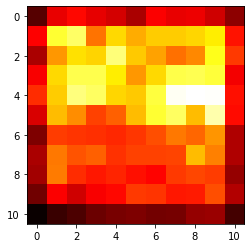

In [2]:
plt.imshow(heatmap, cmap='hot', interpolation='nearest')
plt.show()